# Gaussian Naive Bayes Classification


## Iris Dataset Exploration


### Import Required Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Loading and Understanding Dataset

In [2]:
from sklearn.datasets import load_iris


### Feature Matrix (X) and Target Vector (y)


In [3]:
X,y=load_iris(return_X_y=True)

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Split Data into Training and Testing Sets


In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### Import Gaussian Naive Bayes Classifier


In [6]:
from sklearn.naive_bayes import GaussianNB

### Model Training

In [7]:
gnb=GaussianNB()

In [8]:
gnb.fit(X_train,y_train)

GaussianNB()

### Model Prediction

In [9]:
y_pred=gnb.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

### Model Evaluation Metrics

In [10]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print("Accuracy score:",accuracy_score(y_pred,y_test))
print("Confusion matrix:",confusion_matrix(y_pred,y_test))
print("Classification report:",classification_report(y_pred,y_test))


Accuracy score: 0.9777777777777777
Confusion matrix: [[19  0  0]
 [ 0 12  0]
 [ 0  1 13]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



## Tips Dataset Exploration


In [11]:
import seaborn as sns

df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [13]:
df.shape

(244, 7)

In [14]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [15]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(1)

In [17]:
df[df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [18]:
df.drop_duplicates(inplace=True)

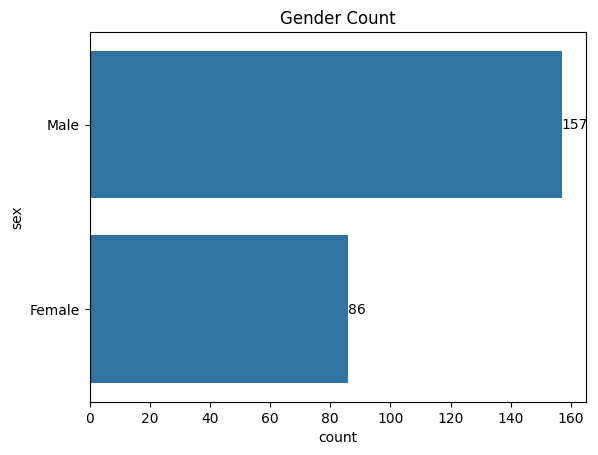

In [19]:
ax=sns.countplot(df['sex'])

for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Gender Count")
plt.show()

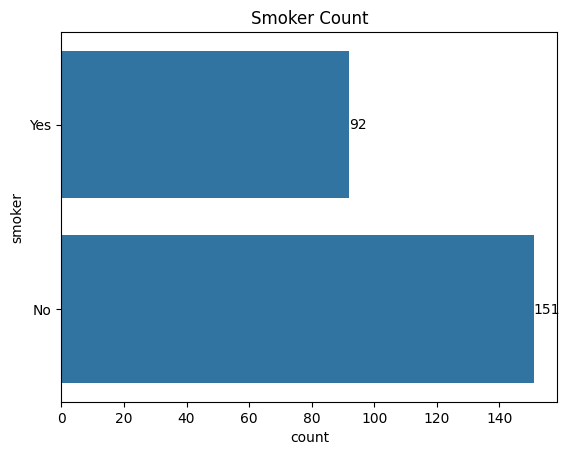

In [20]:
ax=sns.countplot(df['smoker'])

for bar in ax.containers:
  ax.bar_label(bar)

plt.title("Smoker Count")
plt.show()

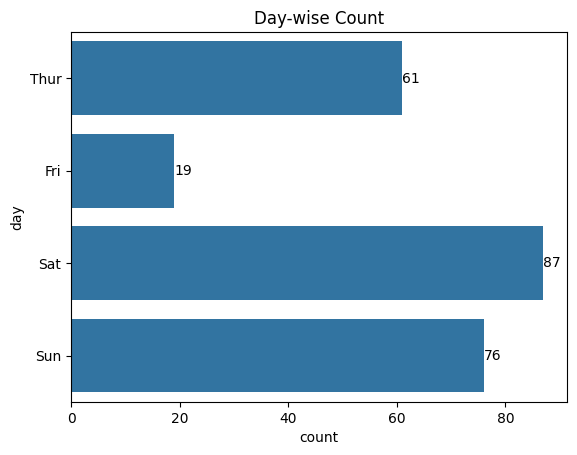

In [21]:
ax=sns.countplot(df['day'])

for bar in ax.containers:
  ax.bar_label(bar)

plt.title("Day-wise Count")
plt.show()

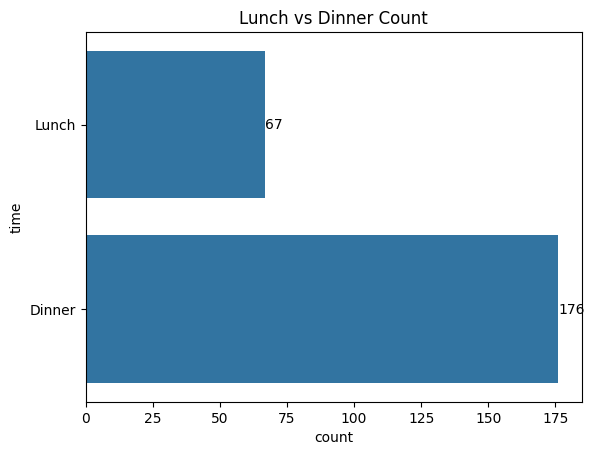

In [22]:
ax=sns.countplot(df['time'])

for bar in ax.containers:
  ax.bar_label(bar)

plt.title("Lunch vs Dinner Count")
plt.show()

In [23]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [24]:
print("Average tip:",df['total_bill'].mean())

Average tip: 19.813868312757204


In [25]:
print("Min Tip:",df['tip'].min())
print("Max Tip:",df['tip'].max())

Min Tip: 1.0
Max Tip: 10.0


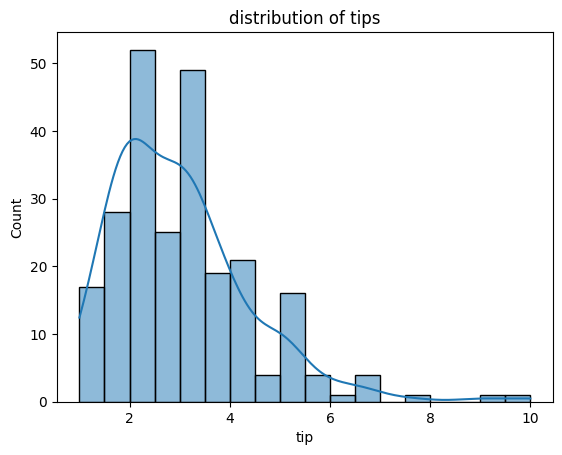

In [26]:
sns.histplot(df['tip'],kde=True)
plt.title("distribution of tips")
plt.show()

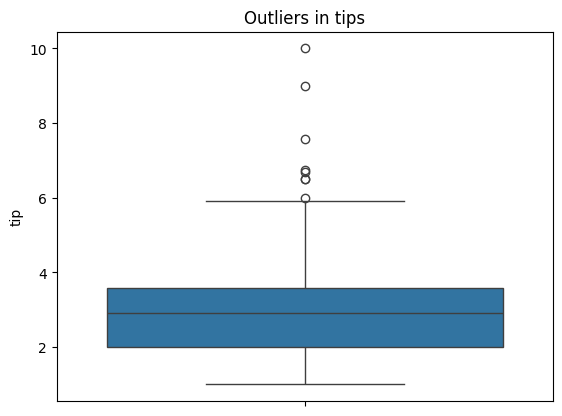

In [27]:
sns.boxplot(df['tip'])
plt.title("Outliers in tips")
plt.show()

In [28]:
q1=df['total_bill'].quantile(0.25)
q3=df['total_bill'].quantile(0.75)

iqr=q3-q1

lower_fence=q1-1.5*iqr
upper_fence=q3-1.5*iqr

print("Lower Fence:",lower_fence)
print("Upper Fence:",upper_fence)

Lower Fence: -2.8124999999999964
Upper Fence: 7.982500000000002


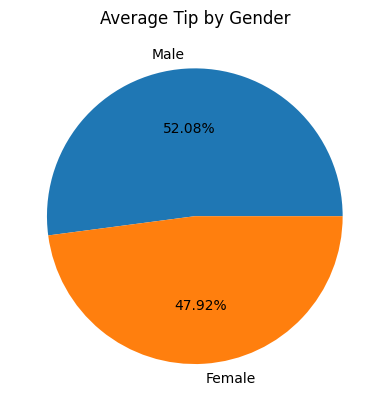

In [29]:
gb1=df.groupby('sex',observed=True)['tip'].mean().reset_index()

plt.pie(gb1['tip'],labels=gb1['sex'],autopct='%1.2f%%')
plt.title("Average Tip by Gender")
plt.show()

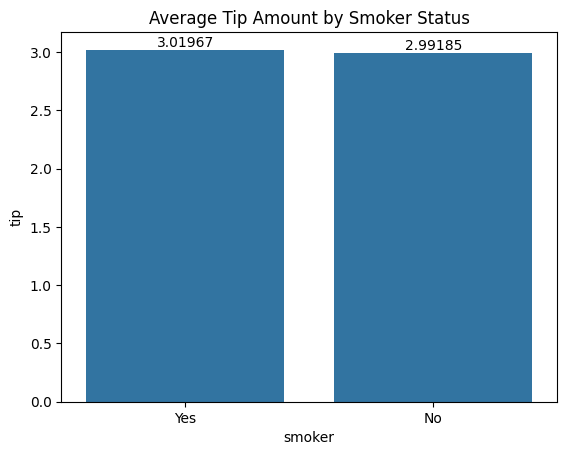

In [30]:
gb2=df.groupby('smoker',observed=True)['tip'].mean().reset_index()

ax=sns.barplot(x='smoker',y='tip',data=gb2)
for bar in ax.containers:
  ax.bar_label(bar)
plt.title("Average Tip Amount by Smoker Status")
plt.show()

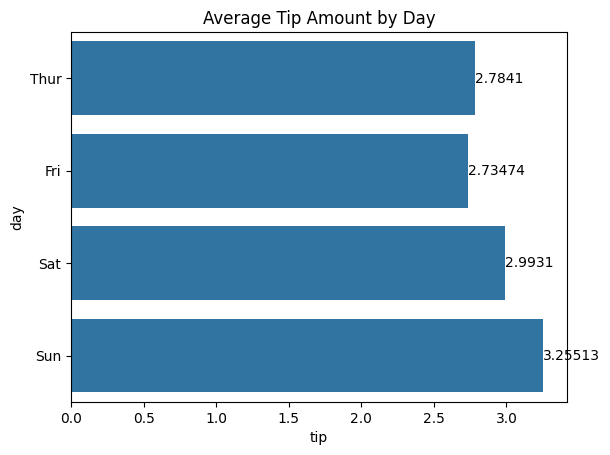

In [31]:
gb3=df.groupby('day',observed=True)['tip'].mean().reset_index().sort_values(by='tip',ascending=False)

ax=sns.barplot(x='tip',y='day',data=gb3)
for bar in ax.containers:
  ax.bar_label(bar)
plt.title("Average Tip Amount by Day")
plt.show()

<Axes: xlabel='day', ylabel='total_bill'>

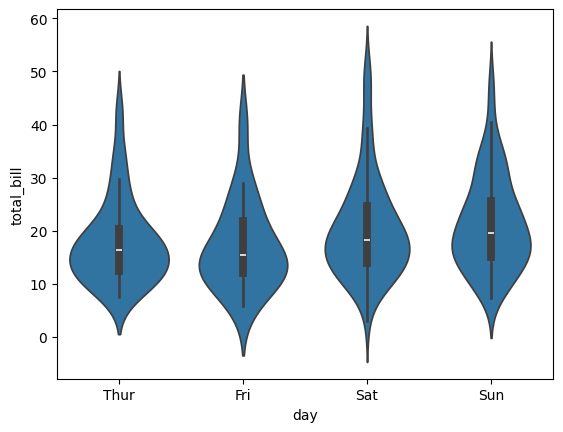

In [32]:
sns.violinplot(x='day',y='total_bill',data=df)

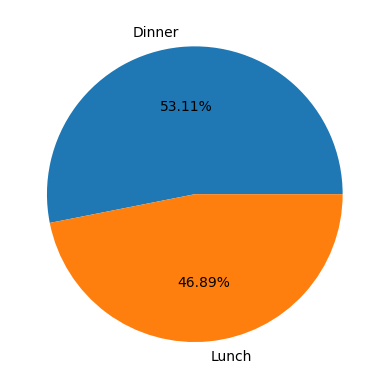

In [33]:
gb4=df.groupby('time',observed=True)['tip'].mean().reset_index().sort_values(by='tip',ascending=False)

plt.pie(gb4['tip'],labels=gb4['time'],autopct='%1.2f%%')
plt.show()

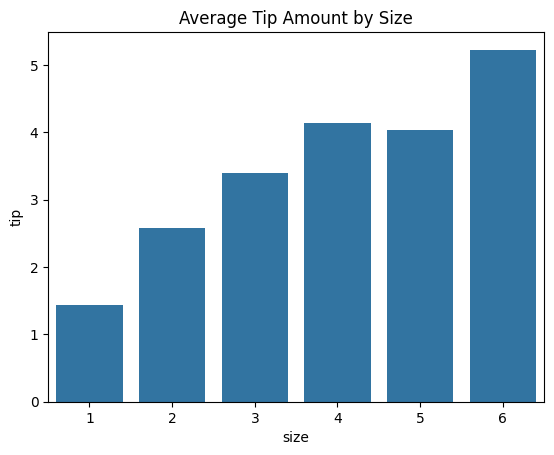

In [34]:
gb5=df.groupby('size')['tip'].mean().reset_index().sort_values(by='tip',ascending=False)

sns.barplot(x='size',y='tip',data=gb5)
plt.title("Average Tip Amount by Size")
plt.show()

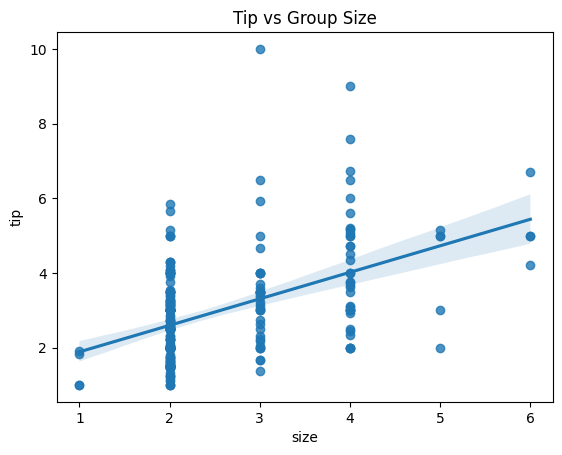

In [35]:
sns.regplot(x='size', y='tip', data=df)
plt.title("Tip vs Group Size")
plt.show()

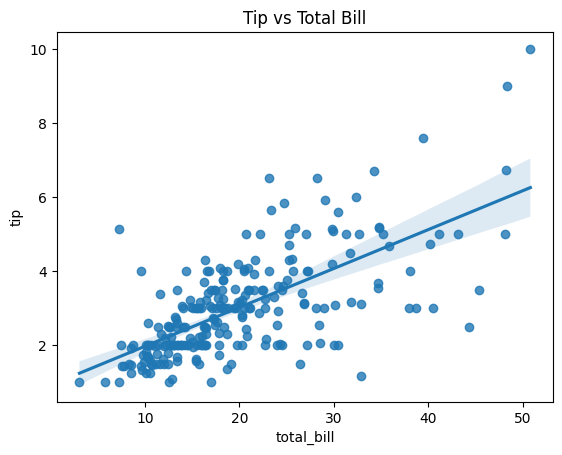

In [36]:
sns.regplot(x='total_bill', y='tip', data=df)
plt.title("Tip vs Total Bill")
plt.show()

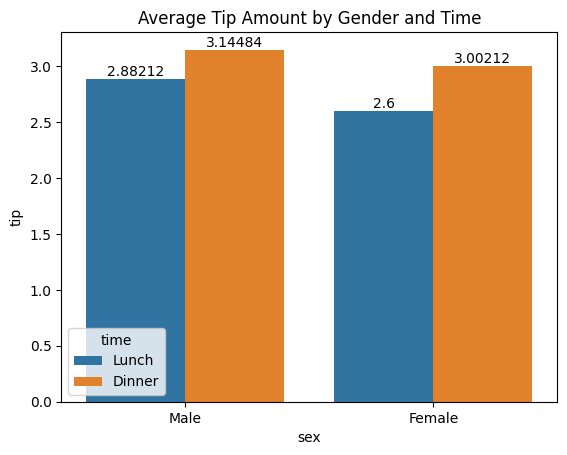

In [37]:
gb6=df.groupby(['sex','time'],observed=True)['tip'].mean().reset_index()
ax=sns.barplot(
    data=gb6,
    x='sex',
    y='tip',
    hue='time'
)

for bar in ax.containers:
  ax.bar_label(bar)
plt.title("Average Tip Amount by Gender and Time")
plt.show()

In [38]:
df.groupby(['smoker','day'],observed=True)['tip'].mean().reset_index()

,smoker,day,tip
0,Yes,Thur,3.094375
1,Yes,Fri,2.714000
2,Yes,Sat,2.875476
3,Yes,Sun,3.516842
4,No,Thur,2.673778
5,No,Fri,2.812500
6,No,Sat,3.102889
7,No,Sun,3.167895


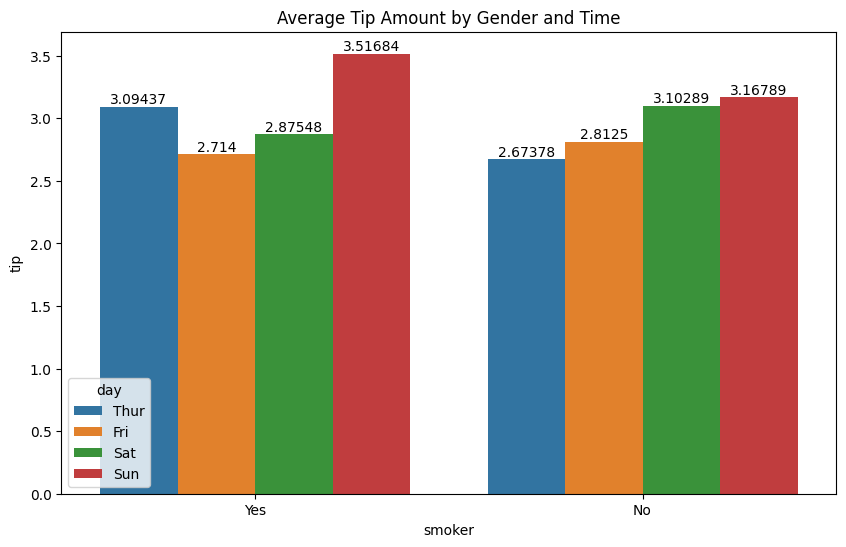

In [39]:
gb7=df.groupby(['smoker','day'],observed=True)['tip'].mean().reset_index()

plt.figure(figsize=(10,6))
ax=sns.barplot(
    data=gb7,
    x='smoker',
    y='tip',
    hue='day'
)

for bar in ax.containers:
  ax.bar_label(bar)
plt.title("Average Tip Amount by Gender and Time")
plt.show()

### Encode Categorical Features


In [40]:
from sklearn.preprocessing import LabelEncoder

le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()


In [41]:
df['sex']=le1.fit_transform(df['sex'])
df['smoker']=le2.fit_transform(df['smoker'])


In [42]:
le1.classes_

array(['Female', 'Male'], dtype=object)

In [43]:
df = pd.get_dummies(df, columns=['day'], drop_first=True)
df

,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun
0,16.99,1.01,0,0,Dinner,2,False,False,True
1,10.34,1.66,1,0,Dinner,3,False,False,True
2,21.01,3.50,1,0,Dinner,3,False,False,True
3,23.68,3.31,1,0,Dinner,2,False,False,True
4,24.59,3.61,0,0,Dinner,4,False,False,True
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,Dinner,3,False,True,False
240,27.18,2.00,0,1,Dinner,2,False,True,False
241,22.67,2.00,1,1,Dinner,2,False,True,False
242,17.82,1.75,1,0,Dinner,2,False,True,False


In [44]:
day_cols = ['day_Fri', 'day_Sat', 'day_Sun']
df[day_cols] = df[day_cols].astype(int)

df

,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun
0,16.99,1.01,0,0,Dinner,2,0,0,1
1,10.34,1.66,1,0,Dinner,3,0,0,1
2,21.01,3.50,1,0,Dinner,3,0,0,1
3,23.68,3.31,1,0,Dinner,2,0,0,1
4,24.59,3.61,0,0,Dinner,4,0,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,Dinner,3,0,1,0
240,27.18,2.00,0,1,Dinner,2,0,1,0
241,22.67,2.00,1,1,Dinner,2,0,1,0
242,17.82,1.75,1,0,Dinner,2,0,1,0


In [45]:
df['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [46]:
df['time']=df['time'].map({'Dinner':0,'Lunch':1})
df

,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun
0,16.99,1.01,0,0,0,2,0,0,1
1,10.34,1.66,1,0,0,3,0,0,1
2,21.01,3.50,1,0,0,3,0,0,1
3,23.68,3.31,1,0,0,2,0,0,1
4,24.59,3.61,0,0,0,4,0,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,0,3,0,1,0
240,27.18,2.00,0,1,0,2,0,1,0
241,22.67,2.00,1,1,0,2,0,1,0
242,17.82,1.75,1,0,0,2,0,1,0


In [47]:
X=df.drop('time',axis=1)
y=df['time']

In [48]:
X

,total_bill,tip,sex,smoker,size,day_Fri,day_Sat,day_Sun
0,16.99,1.01,0,0,2,0,0,1
1,10.34,1.66,1,0,3,0,0,1
2,21.01,3.50,1,0,3,0,0,1
3,23.68,3.31,1,0,2,0,0,1
4,24.59,3.61,0,0,4,0,0,1
...,...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,3,0,1,0
240,27.18,2.00,0,1,2,0,1,0
241,22.67,2.00,1,1,2,0,1,0
242,17.82,1.75,1,0,2,0,1,0


### Train Gaussian Naive Bayes on Tips Dataset


In [49]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [50]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()

In [51]:
gnb.fit(X_train,y_train)

GaussianNB()

In [52]:
y_pred=gnb.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1])

In [53]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print("Accuracy score:",accuracy_score(y_pred,y_test))
print("Confusion matrix:",confusion_matrix(y_pred,y_test))
print("Classification report:",classification_report(y_pred,y_test))

Accuracy score: 0.958904109589041
Confusion matrix: [[54  0]
 [ 3 16]]
Classification report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       1.00      0.84      0.91        19

    accuracy                           0.96        73
   macro avg       0.97      0.92      0.94        73
weighted avg       0.96      0.96      0.96        73



### Prediction on New Input Data


In [54]:
new_total_bill=17.73
tip=3.00
sex='Female'
smoker='Yes'
size=2
day='Sat'

sex_enc = le1.transform([sex])[0]       # Female → 0
smoker_enc = le2.transform([smoker])[0] # Yes → 1

In [55]:
le1.classes_


array(['Female', 'Male'], dtype=object)

In [56]:
le2.classes_

array(['No', 'Yes'], dtype=object)

In [57]:
day_Fri = 0
day_Sat = 1
day_Sun = 0

In [58]:
X_new = [[
    17.73,   # total_bill
    3.00,    # tip
    0,       # sex (Female)
    1,       # smoker (Yes)
    2,       # size
    0,       # day_Fri
    1,       # day_Sat
    0        # day_Sun
]]


### Final Prediction Result


dinner->0
lunch->1

In [59]:
pred =gnb.predict(X_new)

print("predicted values:",pred[0])

predicted values: 0


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
